## Project-1


## Flight Fare Prediction

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

In [2]:
pwd

'C:\\Users\\nejum'

In [3]:
#Loading the data
data=pd.read_excel('Flight_Fare.xlsx')

In [4]:
#basic checks
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
data.info()
# No missing values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Finding missing values

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [13]:
data.shape

(10682, 11)

In [14]:
data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

## Exploratory Data Analysis

In [15]:
#converting data_of Journey to datetime format
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [16]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
# converted Date_of_Journey into integer,so we can drop it

data.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [19]:
#converting Dep_Time
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# we can drop Dep_Time because it no longer needed
data.drop(["Dep_Time"], axis = 1, inplace = True)


C:\Users\nejum\AppData\Local\Temp\ipykernel_5752\2482536006.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
C:\Users\nejum\AppData\Local\Temp\ipykernel_5752\2482536006.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute


In [20]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [21]:
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# drop Arrival_Time because no longer needed

data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\nejum\AppData\Local\Temp\ipykernel_5752\932927556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
C:\Users\nejum\AppData\Local\Temp\ipykernel_5752\932927556.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute


In [22]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
# converting duration column

duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [24]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [25]:
# droping duration column

data.drop(["Duration"], axis = 1, inplace = True)

In [26]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Data Visualization

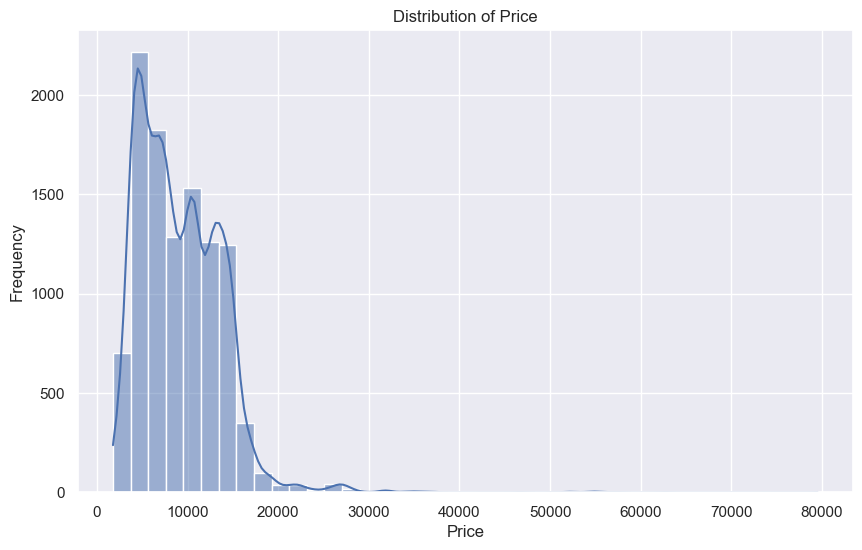

In [27]:
# Visualize the distribution according to 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=40, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='Source', ylabel='Price'>

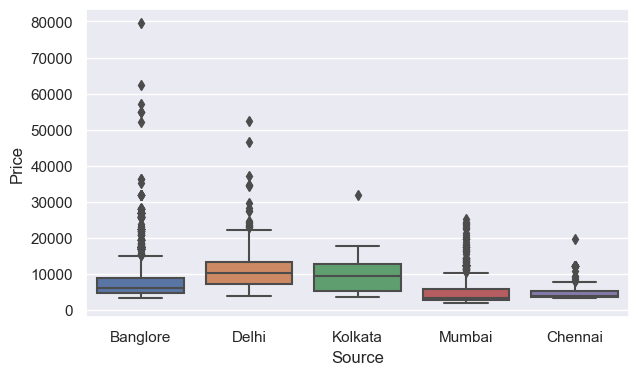

In [28]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))

C:\Users\nejum\AppData\Local\Temp\ipykernel_5752\3715534174.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Stops', y='Price', ci=None)


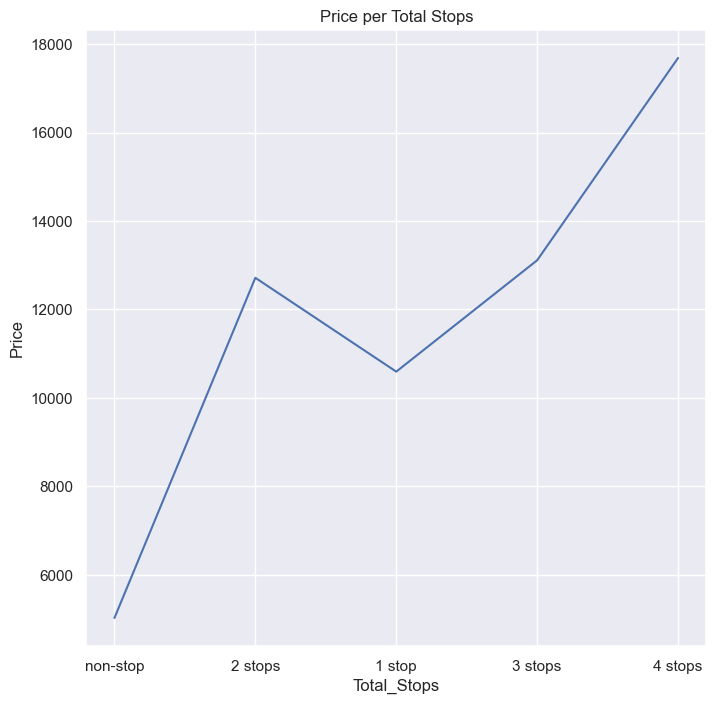

In [29]:
plt.figure(figsize=(8,8))


sns.lineplot(data=data, x='Total_Stops', y='Price', ci=None)
plt.title('Price per Total Stops');

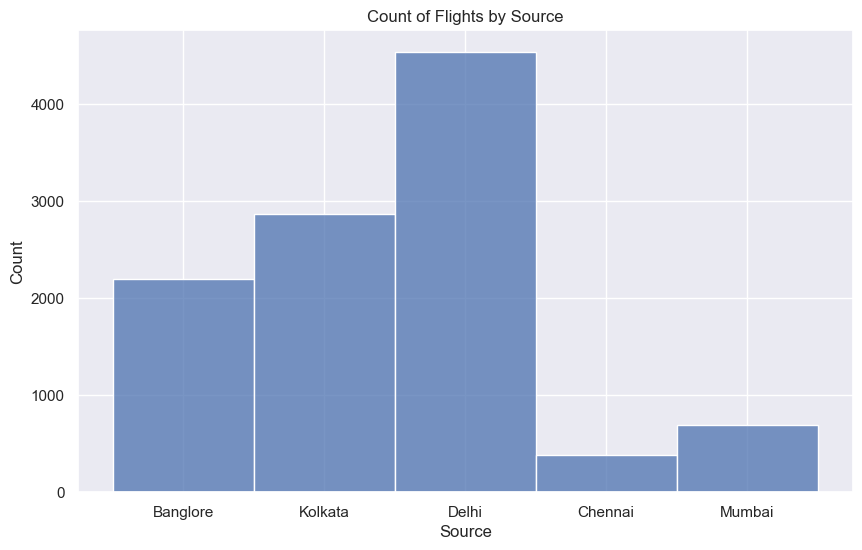

In [30]:
# Visualize the count of flights by 'Source'
plt.figure(figsize=(10, 6))
sns.histplot(x='Source', data=data)
plt.title('Count of Flights by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

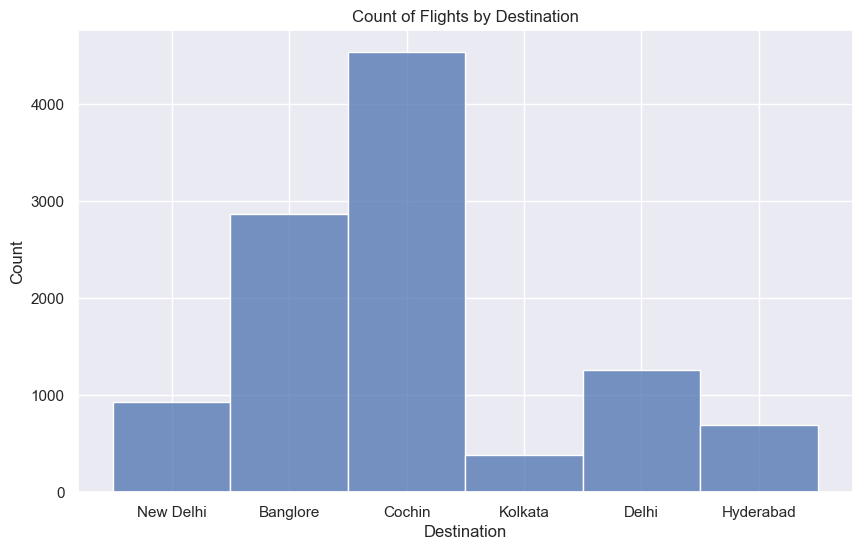

In [31]:
# Visualize the count of flights by 'Destination'
plt.figure(figsize=(10, 6))
sns.histplot(x='Destination', data=data)
plt.title('Count of Flights by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

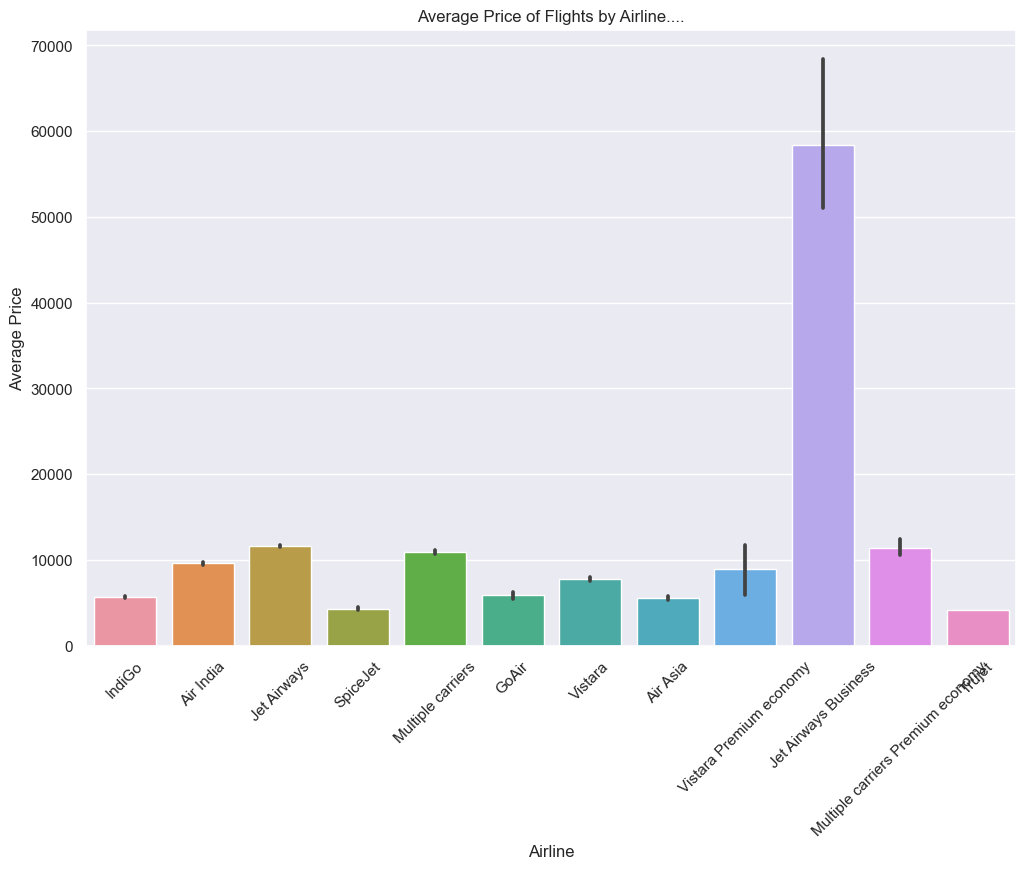

In [32]:
# Visualize the average price of flights by 'Airline'
plt.figure(figsize=(12, 8))
sns.barplot(x='Airline', y='Price', data=data)
plt.title('Average Price of Flights by Airline....')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


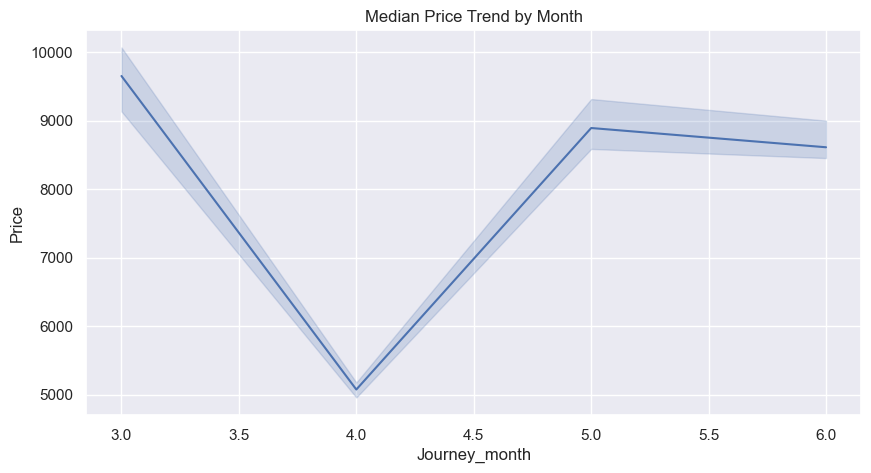

In [33]:
# visualize month_of journey with price
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Journey_month', y='Price', estimator=np.median)
plt.title('Median Price Trend by Month')
plt.show()

In [34]:
data.describe(include=['O']).columns 

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [35]:
# converting categorical data into numerical

In [36]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [37]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.replace({False: 0, True: 1}, inplace= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [39]:
# performing onehotencoding for source data

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.replace({False: 0, True: 1}, inplace= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
data["Destination"].value_counts()


Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [41]:
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.replace({False: 0, True: 1}, inplace= True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [42]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [43]:
# tatal stops is Ordinal Categorical data so LabelEncoder is using here

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [44]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [45]:
data["Route"].value_counts()


Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [46]:
# drop route as it is of no use

data.drop(["Route"], axis = 1, inplace = True)

In [47]:
# drop Additional_info as it contain no information

data.drop(["Additional_Info"], axis = 1, inplace = True)

In [48]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [49]:
# combined dataframe

data1 = pd.concat([data,Airline,Source,Destination], axis = 1)

In [50]:
data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [51]:
data1.drop(["Airline","Source","Destination"], axis = 1, inplace = True)

In [52]:
data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [53]:
#Finding out the best feature which will contribute and have good relation with the target variable(Price).

In [54]:
data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

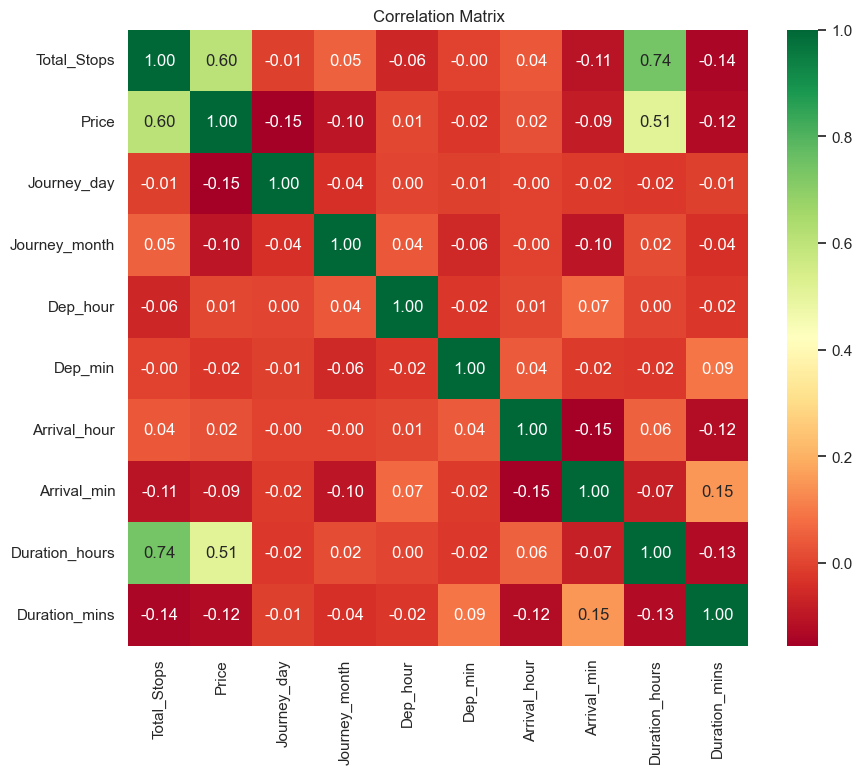

In [55]:
# Correlation matrix to see the relationship between numerical features
correlation = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
# There is a high correlation between:
  # Price & Total Stops
  # Price & flight duration
  # Duration & Total stops


## Building the Machine Learning Models

## Linear Regression Model

In [57]:
temp_col = data1.columns.to_list()
print(temp_col, '\n')

new_col = temp_col[: 1] + temp_col[2:]
new_col.append(temp_col[1])
print(new_col, '\n')

data1 = data1.reindex(columns = new_col)
data1.head()


['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi'] 

['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vi

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,1,5,5,50,13,15,7,25,1,...,0,0,1,0,0,0,0,0,0,7662
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,1,0,0,0,0,13882
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,0,0,0,0,0,6218
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,13302


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(data1)

data1[0]

array([-1.22066609,  1.23728754, -1.46740227,  1.65415376, -0.2349499 ,
       -1.80043628, -0.8900139 , -0.97061397,  1.27904078, -0.44278513,
       -0.13600489,  2.05015058, -0.75053033, -0.02370671, -0.35507822,
       -0.03490678, -0.28797191, -0.00967596, -0.21667251, -0.01676082,
       -0.19231927, -0.85909313, -0.60626609, -0.2642058 , -0.85909313,
       -0.36651266, -0.2642058 , -0.19231927,  3.23440464, -1.12553455])

In [59]:
from sklearn.model_selection import train_test_split as tts

x = data1[:, : -1]
y = data1[:, -1]

In [60]:
y

array([-1.12553455, -0.30906781,  1.03978296, ..., -0.40296691,
        0.77218138,  0.57809433])

In [61]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.1, random_state = 1 )

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 29)
(1069, 29)
(9613,)
(1069,)


In [62]:
# creating model

from sklearn.linear_model import LinearRegression

model = LinearRegression() # object creation
model.fit(x_train, y_train) # training of linear regression

LinearRegression()

In [71]:
# Model evaluation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metrics(y_test, y_pred):
    print("r2_score:", r2_score(y_test,y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
def accuracy(y_test, y_pred):
        errors = abs(y_test - y_pred)
        mape = 100 * np.mean(errors/y_test)
        accuracy = 100 - mape
        return accuracy
    

In [72]:
y_pred= model.predict(x_test)

In [73]:
metrics(y_test, y_pred)

r2_score: 0.5588994213398681
MAE: 0.4313475339739083
RMSE: 0.6501450852554853


In [75]:
accuracy(y_test, y_pred)

83.39731141056413

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=500) #object creation ,taking 500 decision tree in random forest 
model_rf.fit(x_train,y_train)#training the data

RandomForestRegressor(n_estimators=500)

In [77]:
y_pred_rf = model_rf.predict(x_test)

In [78]:
metrics(y_test, y_pred_rf)

r2_score: 0.7499193207081876
MAE: 0.2777757508920315
RMSE: 0.4895325117593614


In [79]:
accuracy(y_test, y_pred_rf)

92.89114293822769

## Gradient Boosting

In [81]:
## importing the model library

from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(x_train,y_train) ## fitting the data

GradientBoostingRegressor()

In [82]:
y_gbm=gbm.predict(x_test)#predicting the price

In [83]:
metrics(y_test, y_gbm)

r2_score: 0.7016646694590838
MAE: 0.34344501180630993
RMSE: 0.5346798457707603


In [84]:
accuracy(y_test, y_gbm)

86.41658853418558